1-d and 2

##### Question 1-d

k with dialation 2 = 
$$
K^` = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}
$$
$$
A = 
\begin{bmatrix}
1 & 5 & -2 & 2 \\
-2 & 4 & 4 & -1 \\
1 & -2 & 6 & 3 \\
3 & -3 & 6 & 1
\end{bmatrix}
$$

Output W = floor((4 - 3 + 0)/1 + 1) = 2  
Output H = floor((4 - 3 + 0)/1 + 1) = 2

$$
\begin{bmatrix}
1 & 5 & -2 \\
-2 & 4 & 4 \\
1 & -2 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}
= -5
$$
$$
\begin{bmatrix}
5 & -2 & 2 \\
4 & 4 & -1 \\
-2 & 6 & 3
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}
= 2
$$
$$
\begin{bmatrix}
-2 & 4 & 4 \\
1 & -2 & 6 \\
3 & -3 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}
-8
$$
$$
\begin{bmatrix}
4 & 4 & -1 \\
-2 & 6 & 3 \\
-3 & 6 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -1
\end{bmatrix}
= 3
$$

$$
A * K' =
\begin{bmatrix}
-5 & 2 \\
-8 & 3
\end{bmatrix}
$$

#### Question 2

In [1]:
import torch
import torch.nn as nn

import requests
from io import BytesIO
from PIL import Image, ImageOps

import numpy as np

In [ ]:
# Define the image
url = "https://www.jsonline.com/gcdn/presto/2020/08/13/PMJS/086e6c1e-a091-494b-b940-6b3259589040-MJS_UW_MADISON_COVID_12894.JPG"
def get_image_from_url(url):
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img = img.resize((600, 500))
    img = ImageOps.grayscale(img)
    return img
    
img = get_image_from_url(url)
img = torch.from_numpy(np.array(img)).float() / 255.

# Define Sobel kernels
sobel_x = torch.tensor([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]]).float()

sobel_y = torch.tensor([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]]).float()


tensor([[[-1.,  0.,  1.],
         [-2.,  0.,  2.],
         [-1.,  0.,  1.]]])


In [7]:
# Convolution operation using PyTorch's F.conv2d function
import torch.nn.functional as F
response_x = F.conv2d(img.unsqueeze(0).unsqueeze(0), sobel_x.unsqueeze(0).unsqueeze(0))
response_y = F.conv2d(img.unsqueeze(0).unsqueeze(0), sobel_y.unsqueeze(0).unsqueeze(0))
grad_magnitude = torch.sqrt(response_x**2 + response_y**2)

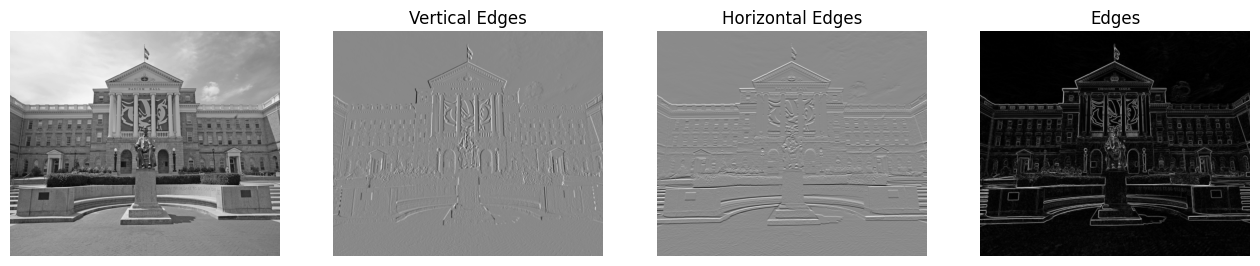

In [8]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img, "gray")
ax[0].axis(False)
ax[1].imshow(response_x[0, 0], "gray")
ax[1].axis(False)
ax[1].set_title("Vertical Edges")
ax[2].imshow(response_y[0, 0], "gray")
ax[2].axis(False)
ax[2].set_title("Horizontal Edges")
ax[3].imshow(grad_magnitude[0, 0], "gray")
ax[3].axis(False)
ax[3].set_title("Edges");